In [30]:
import os
from tika import parser
from gensim.parsing.preprocessing import remove_stopwords
from gensim import corpora, matutils, models, similarities
from spacy.lang.en import English
import pandas as pd
import re 

#create dataframe for letter contents
files = [i for i in os.listdir("SequoiaLetters2")]
letters=[]
f_letters=[]
for file in files:
    filename = os.path.basename(file)
    letterName = filename.strip('.pdf')
    file_data = parser.from_file(file) 
    text = file_data['content']
    filtered_text = remove_stopwords(text)
    #Remove excess words (before and after letter)
    split_text = text.split("Disclosures", 1)
    text = split_text[0]
   
    split_text2 = text.split("Dear", 1)
    text = split_text2[1]
    filtered_text = remove_stopwords(text)
    letters.append([letterName,text])
    f_letters.append([letterName,text])

df_raw = pd.DataFrame(letters, columns=['title','content'])
df_raw = df_raw.sort_values('title')
df_filtered = pd.DataFrame(f_letters, columns=['title','content'])
df_filtered = df_filtered.sort_values('title')

print(df_raw)

      title                                            content
10  2016_Q2   Clients and Sequoia Shareholders: \n \nYou ma...
11  2016_Q3   Clients and Shareholders: \n\n \n\nThe third ...
15  2016_Q4   Shareholder: \n\nWe completed our most diffic...
2   2017_Q1   Shareholder: \n \nSequoia Fund generated a 5....
1   2017_Q2   Sequoia Shareholders and Clients: \n\nSequoia...
0   2017_Q3   Sequoia Shareholders and Clients:  \n\nSequoi...
5   2017_Q4   Sequoia Shareholders and Clients: \n\nSequoia...
14  2018_Q1   Sequoia Shareholders and Clients:  \n\nFor th...
12  2018_Q2   Sequoia Shareholders and Clients:  \n\nFor th...
13  2018_Q3   Sequoia Shareholders and Clients:  \n\nFor th...
8   2018_Q4   Sequoia Shareholders and Clients:  \n\nSequoi...
4   2019_Q1   Sequoia Shareholders and Clients:  \n\nFor th...
7   2019_Q2   Sequoia Shareholders and Clients:  \n\nFor th...
6   2019_Q3   Sequoia Shareholders and Clients:  \n\nFor th...
3   2019_Q4   Sequoia Shareholders and Clients:  \n\nSe

In [32]:
from gensim import corpora, matutils, models, similarities
import re 

#word tokenization of letters
word_list = []
for letter in df_filtered.content:
    word_list.append(re.findall('(\\w+)', letter.lower()))

#create lexicon of tokenized words
lexicon = corpora.Dictionary(word_list)
lexicon.token2id

#create bag of words from lexicon
bow = []
for t in word_list:
    bow.append(lexicon.doc2bow(t))

#build tfidf model to determine 5 most relevant words
tfidf = models.TfidfModel(bow)
tf_obj = tfidf[bow[1]]
n_terms = 5
top_terms = []
for obj in sorted(tf_obj, key=lambda x: x[1], reverse=True)[:n_terms]:
    top_terms.append([lexicon[obj[0]], obj[1]])

print(top_terms)

[['trimble', 0.23898194131396666], ['walmart', 0.18035948435115173], ['bank', 0.179236455985475], ['dental', 0.179236455985475], ['sirona', 0.15038583058059174]]


Text(0.5, 1.0, 'Top 5 Relevant Words for Q3 2016 Letter')

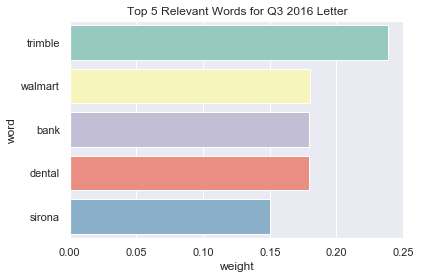

In [46]:
import seaborn as sns

#visualize important words
df_tfidf = pd.DataFrame(top_terms, columns=['word','weight'])
sns.barplot(x="weight",y="word", data=df_tfidf, palette="Set3").set_title("Top 5 Relevant Words for Q3 2016 Letter")